In [1]:
# from torch.nn.modules.pooling import AdaptiveAvgPool2d
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor, Lambda
import torchvision.models as models
import torchvision

import torch.optim as optim
from torch.optim import lr_scheduler

from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import numpy as np

import os

import time
import os
import copy
import math

import cv2

import seaborn as sns

import abc  # For implementing abstract methods

import CAM.cam
from utils import load_model, load_data, train_cam_models, test_cam_models,  informacion_umbral_mascaras
import json
import math
from torchvision.transforms import Resize

DEVICE:  cuda:0
Clases:  ['Benign', 'Pathological']
Train image size: 6366
Validation image size: 1591
Test image size: 4158
Dataset loaded.






DEVICE:  cuda
Clases:  ['Benign', 'Pathological']
Train image size: 6366
Validation image size: 1591
Test image size: 4158
Dataset loaded.

model_cam loaded


C:\Users\pedro\Documents\TFG\TFG\src\CAM\cam_abstract.py:124: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2318.)
  activations_final = relu(((parameters[class_i]*activations.T).T).sum(axis=0)).to(device)


[39]
[39]
[39]
[79]
[119]
[119]
[159]
[159]
[159]
[None] Mejor valor:  0.5448964251133426  con el umbral:  0.1
[None] Área bajo la curva:  0.30592016132805744


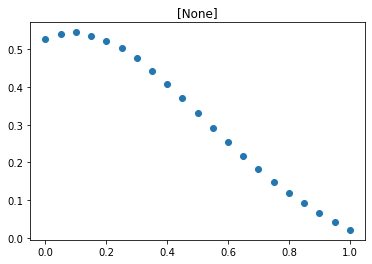

model_cam_pro loaded
[39]
[39]
[39]
[79]
[79]
[79]
[119]
[119]
[159]
[159]
[159]
[gradcam] Mejor valor:  0.5427787167372811  con el umbral:  0.15000000000000002
[gradcam] Área bajo la curva:  0.3153811716586851


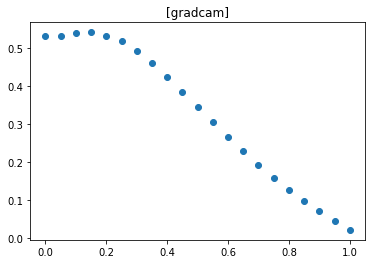

[39]
[39]
[39]
[79]
[79]
[119]
[159]
[159]
[gradcampp] Mejor valor:  0.5606949063974921  con el umbral:  0.15000000000000002
[gradcampp] Área bajo la curva:  0.3291701556568648


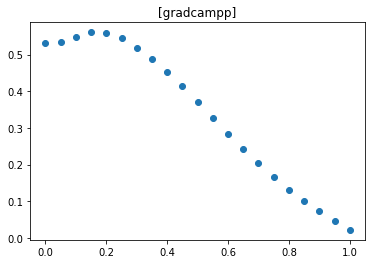

[79]
[119]
[smoothgradcampp] Mejor valor:  0.5551360829187526  con el umbral:  0.15000000000000002
[smoothgradcampp] Área bajo la curva:  0.3202763210847404


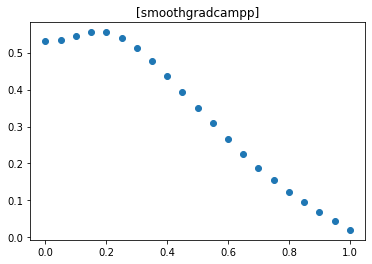

ValueError: attempt to get argmax of an empty sequence

In [2]:

# Reset CUDA cache
torch.cuda.empty_cache()

path_guardado_modelos = 'modelos/'

def run():
    # List of technics to train
    model_classes = ['cam', 'cam_pro']
    technics = ['cam','gradcam', 'gradcampp', 'smoothgradcampp']

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('DEVICE: ', device)

    # Read datasets
    dataloaders, dataset_sizes = load_data(r'..\..\SICAPv1\299_patch_impar')
    print('\n\n\n\n')

    """
    # Entrenamos
    train_cam_models(path_guardado_modelos, epochs=15)
    print('\n\n\n\n')
    
    # Testeamos 
    test_cam_models(path_guardado_modelos)
    print('\n\n\n\n')
    """

    informacion_umbral_mascaras(path_guardado_modelos, device='cuda')
    
    
    models_dic = {}
    for name in model_classes:
        # Load model
        models_dic[f'{name}'] = load_model(path_guardado_modelos, name, device)



    for i in range(2):
        # Cogemos la activación de las capas
        x, mask, act_classes=next(iter(dataloaders['test']))

        while act_classes[0]!=1:
            x, mask, act_classes=next(iter(dataloaders['test']))

        print("AAAAAAA", act_classes)
        x=x.to(device)
        for technic in technics:
            act_classes=act_classes.to(device)

            if 'cam'==technic:
                model_name = model_classes[0]
            else:
                model_name = model_classes[1]


            models_dic[f'{model_name}']['model'].plot_saliency_map(x, 
                                                                   act_classes[0],
                                                                   technic,
                                                                   mask,
                                                                   class_plot=-1,
                                                                   n_noise=20,
                                                                   std=0.2,
                                                                   device=device)

            print("#"*70)
            print("#"*70)
            print("#"*70)


run()

In [ ]:
import utils
dtst = datasets.ImageFolder(os.path.join(r'..\..\SICAPv1\299_patch_impar', 'train_mask'), utils.get_data_transforms()['test'],)
dloader = torch.utils.data.DataLoader(dtst, batch_size=1, shuffle=True, num_workers=2)

print(dtst.__getitem__(0))
x,y = next(iter(dloader))


In [ ]:
def holi(num):
    lista=[]

    print('#'*1000)
    for i in range(num):
        lista.append(torch.ones((200,1000)).to('cuda'))

        t = torch.cuda.get_device_properties(0).total_memory
        r = torch.cuda.memory_reserved(0)
        a = torch.cuda.memory_allocated(0)
        f = r-a  # free inside reserved

        print(f'total    : {t}')
        print(f'used     : {a}')
        print(f'free    : {f}\n\n')
        
    #lista = []
        
for i in range(100):
    holi(10)

In [ ]:

t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

print(f'total    : {t}')
print(f'used     : {a}')
print(f'free    : {f}\n\n')
torch.cuda.empty_cache()